<h1> Gradient Descent and it's variants</br>1.Performing gradient descent in regression

In [260]:
import tensorflow as tf
import random
import math
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
# to display in notebook
import tqdm




<b>Preparing Dataset


In [261]:
data =np.random.randn(500,2)
print (data[0])
print (data[0,0])
print (data[0,1])

theta = np.zeros(2)
print(theta)


[-1.26150383  0.36114763]
-1.261503832056226
0.3611476299375089
[0. 0.]


<b>Defining Loss Function

In [262]:
def loss_function(data,theta):
    m = theta[0]
    b = theta[1]
    loss = 0
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        y_hat = (m*x + b)
        loss = loss + ((y - (y_hat)) ** 2)
    mse = loss / float(len(data))
    return mse

print(loss_function(data, theta))


0.9143481575179184


<b> Computing Gradients of Loss Function

In [263]:
def compute_gradients(data, theta):
    gradients = np.zeros(2)
    N = float(len(data))
    m = theta[0]
    b = theta[1]
    
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        gradients[0] += - (2 / N) * x * (y - (( m* x) + b))
        gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b))
    epsilon = 1e-6
    gradients = np.divide(gradients, N + epsilon)
    return gradients

compute_gradients(data,theta)

array([ 0.00023882, -0.00016345])

<b> Updating model parameters

  8%|▊         | 83/1000 [00:00<00:02, 387.62it/s]

100%|██████████| 1000/1000 [00:02<00:00, 355.52it/s]


Text(0.5, 1.0, 'Gradient Descent')

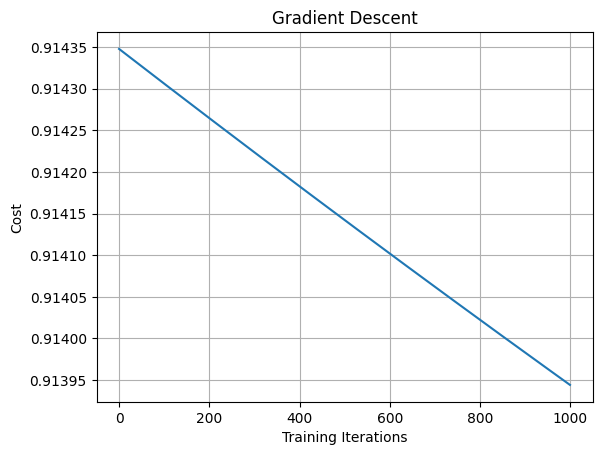

In [264]:
num_iterations = 1000
lr = 1e-2
loss = []
theta = np.zeros(2)
for t in tqdm.tqdm(range(num_iterations)):
    #compute gradients
    gradients = compute_gradients(data, theta)
    #update parameter
    theta = theta - (lr*gradients)
    #store the loss
    loss.append(loss_function(data,theta))

plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')

<h2># Plot graph of the optimizers

In [265]:


def graph(optimizers,title:str):
    theta = np.zeros(2)
    loss = optimizers(data, theta) 
    plt.plot(loss)
    plt.grid()
    plt.title(f'{title}')
    plt.xlabel('Training Iterations')
    plt.ylabel('Cost')


<h2>2. Gradient descent versus stochastic gradient descent


100%|██████████| 1000/1000 [00:03<00:00, 289.61it/s]


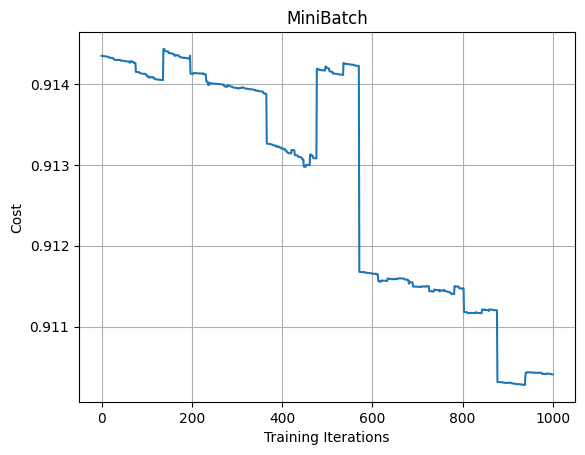

In [266]:
def minibatch(data, theta, lr = 1e-2, minibatch_ratio = 0.01, num_iterations = 1000):
    loss=[]
    minibatch_size = int(math.ceil(len(data) * minibatch_ratio))
    for t in tqdm.tqdm(range(num_iterations)):
        sample_size = random.sample(range(len(data)), minibatch_size)
        np.random.shuffle(data)
        sample_data = data[0:sample_size[0], :]
        grad = compute_gradients(sample_data, theta)
        theta = theta - (lr * grad)
        loss.append(loss_function(data,theta))
    return loss

graph(minibatch,"MiniBatch")

<h2>3.  Momentum-based Gradient Descent

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:02<00:00, 347.15it/s]


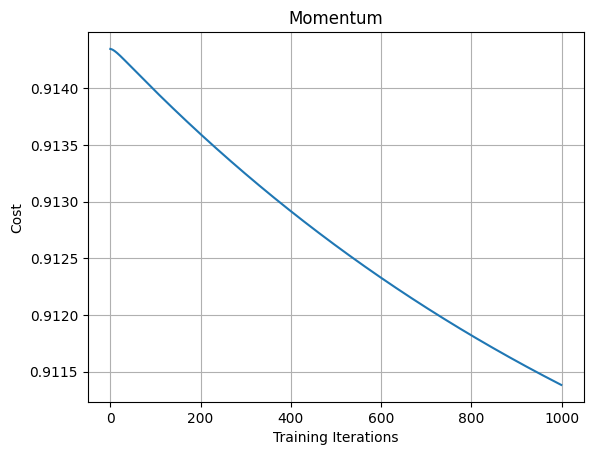

In [267]:
def momentum(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 1000):
    loss=[]
    vt = np.zeros(theta.shape[0])
    for t in tqdm.tqdm(range(num_iterations)):
        gradients = compute_gradients(data, theta)
        vt = gamma * vt + lr * gradients
        theta = theta - vt
        loss.append(loss_function(data,theta))
    return loss

graph(momentum,"Momentum")

<h2> 4. Adaptive Methods of Gradient Descent

<h5>4.1 AdaGrad

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:02<00:00, 363.98it/s]


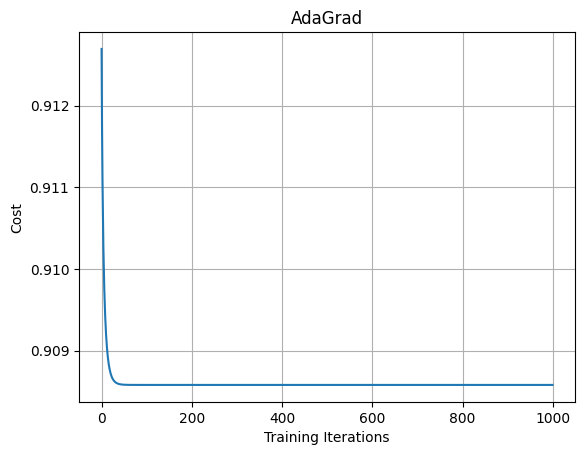

In [268]:
def AdaGrad(data, theta, lr = 1e-2, epsilon = 1e-8, num_iterations = 1000):
    loss=[]
    gradients_sum = np.zeros(theta.shape[0])
    for t in tqdm.tqdm(range(num_iterations)):
        gradients = compute_gradients(data, theta)
        gradients_sum += gradients ** 2
        gradient_update = gradients / (np.sqrt(gradients_sum + epsilon))
        theta = theta - (lr * gradient_update)
        loss.append(loss_function(data,theta))
    return loss

graph(AdaGrad,"AdaGrad")

<h5>4.2 AdaDelta

  4%|▍         | 41/1000 [00:00<00:02, 386.56it/s]

100%|██████████| 1000/1000 [00:02<00:00, 339.38it/s]


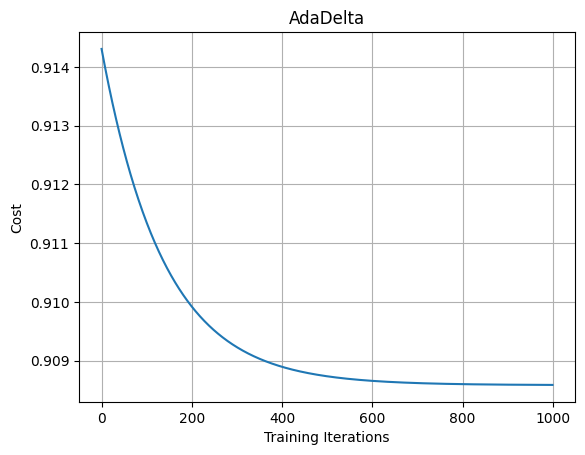

In [269]:
def AdaDelta(data, theta, gamma = 0.9, epsilon = 1e-5, num_iterations = 1000):
    loss=[]
    E_grad2 = np.zeros(theta.shape[0])
    E_delta_theta2 = np.zeros(theta.shape[0])
    for t in tqdm.tqdm(range(num_iterations)):
        gradients = compute_gradients(data, theta)
        E_grad2 = (gamma * E_grad2) + ((1. - gamma) * (gradients ** 2))
        delta_theta = - (np.sqrt(E_delta_theta2 + epsilon)) / (np.sqrt(E_grad2 + epsilon)) * gradients
        E_delta_theta2 = (gamma * E_delta_theta2) + ((1. - gamma) * (delta_theta **2))
        theta = theta + delta_theta
        loss.append(loss_function(data,theta))
    return loss

graph(AdaDelta,"AdaDelta")

<h5>4.3 RMSProp

100%|██████████| 1000/1000 [00:02<00:00, 363.81it/s]


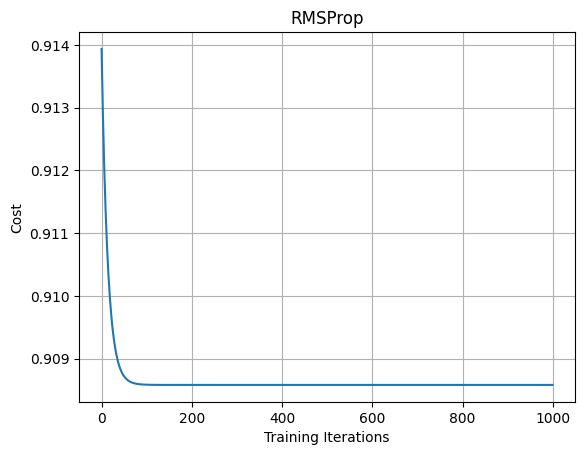

In [270]:
def RMSProp(data, theta, lr = 1e-2, gamma = 0.9, epsilon = 1e-6, num_iterations =1000):
    loss=[]
    E_grad2 = np.zeros(theta.shape[0])
    for t in tqdm.tqdm(range(num_iterations)):
        gradients = compute_gradients(data, theta)
        E_grad2 = (gamma * E_grad2) + ((1. - gamma) * (gradients ** 2))
        theta = theta - (lr / (np.sqrt(E_grad2 + epsilon)) * gradients)
        loss.append(loss_function(data,theta))
    return loss

graph(RMSProp,"RMSProp")

<h5>4.4 Adam( Adaptive Moment Estimation)

100%|██████████| 1000/1000 [00:02<00:00, 353.67it/s]


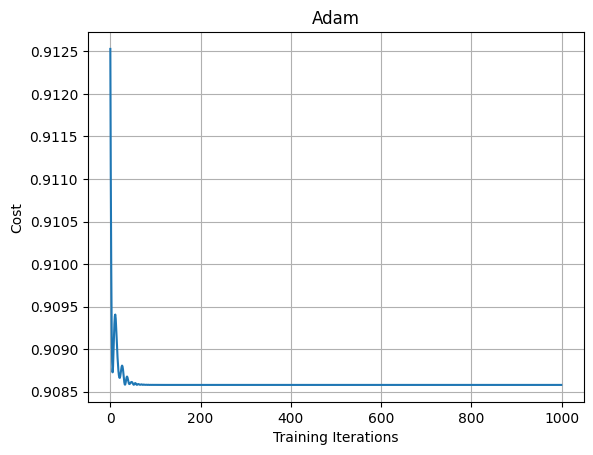

In [271]:
def Adam(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-6,num_iterations = 1000):
    loss=[]
    mt = np.zeros(theta.shape[0])
    vt = np.zeros(theta.shape[0])
    for t in tqdm.tqdm(range(num_iterations)):
        gradients = compute_gradients(data, theta)
        mt = beta1 * mt + (1. - beta1) * gradients
        vt = beta2 * vt + (1. - beta2) * gradients ** 2
        mt_hat = mt / (1. - beta1 ** (t+1))
        vt_hat = vt / (1. - beta2 ** (t+1))
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
        loss.append(loss_function(data,theta))
    return loss

graph(Adam,"Adam")

<h5>4.5 Adamax( Adaptive Moment Estimation)

100%|██████████| 1000/1000 [00:02<00:00, 360.75it/s]


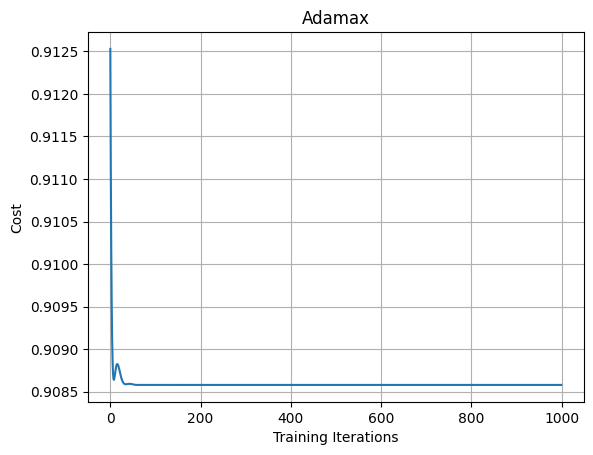

In [272]:
def Adamax(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-6, num_iterations = 1000):
    loss = []   
    mt = np.zeros(theta.shape[0])
    vt = np.zeros(theta.shape[0])
    for t in tqdm.tqdm(range(num_iterations)):
        gradients = compute_gradients(data, theta)
        mt = beta1 * mt + (1. - beta1) * gradients
        vt = np.maximum(beta2 * vt, np.abs(gradients))
        mt_hat = mt / (1. - beta1 ** (t+1))
        theta = theta - ((lr / (vt + epsilon)) * mt_hat)
        loss.append(loss_function(data,theta))
    return loss


graph(Adamax,"Adamax")

<h5>4.6 AMSGrad

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:02<00:00, 350.84it/s]


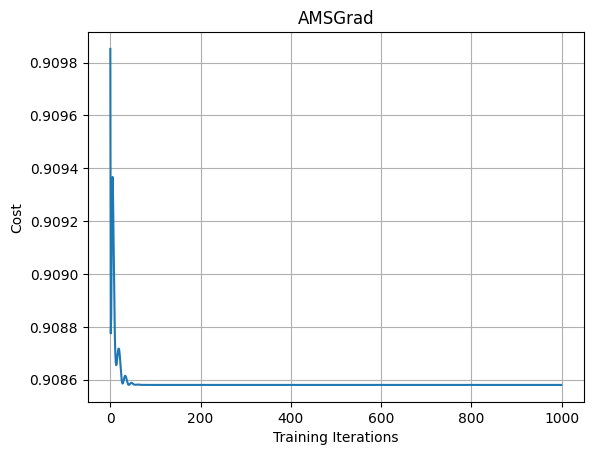

In [273]:
def AMSGrad(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-6, num_iterations = 1000):
    loss = []
    mt = np.zeros(theta.shape[0])
    vt = np.zeros(theta.shape[0])
    vt_hat = np.zeros(theta.shape[0])
    for t in tqdm.tqdm(range(num_iterations)):
        gradients = compute_gradients(data, theta)
        mt = beta1 * mt + (1. - beta1) * gradients
        vt = beta2 * vt + (1. - beta2) * gradients ** 2
        vt_hat = np.maximum(vt_hat,vt)
        mt_hat = mt / (1. - beta1 ** (t+1))
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
        loss.append(loss_function(data,theta))
    return loss

graph(AMSGrad,"AMSGrad")

<h5>4.7 Nadam

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\hp\AppData\Local\Temp\ipykernel_14644\4073718402.py:14: RuntimeWarning: divide by zero encountered in divide
  vt_hat = vt / (1. - beta2 ** (t))
  4%|▍         | 40/1000 [00:00<00:02, 391.48it/s]

100%|██████████| 1000/1000 [00:02<00:00, 360.54it/s]


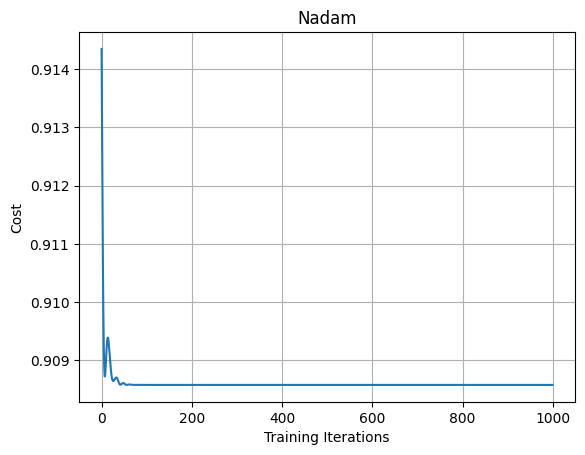

In [ ]:
# def Nadam(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-6, num_iterations = 1000):
   
#     loss = []
#     mt = np.zeros(theta.shape[0])
#     vt = np.zeros(theta.shape[0])
#     beta_prod = 1
#     for t in tqdm.tqdm(range(num_iterations)):
#         gradients = compute_gradients(data, theta)
#         mt = beta1 * mt + (1. - beta1) * gradients
#         vt = beta2 * vt + (1. - beta2) * gradients ** 2
#         beta_prod = beta_prod * (beta1)
#         mt_hat = mt / (1. - beta_prod)
#         g_hat = gradients / (1. - beta_prod)
#         vt_hat = vt / (1. - beta2 ** (t))
#         mt_tilde = (1-beta1**t+1) * mt_hat + ((beta1**t)* g_hat)
#         theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
#         loss.append(loss_function(data,theta))

#     return loss

# graph(Nadam,"Nadam")